## Arsitektur CNN

In [1]:
import torch

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5)
        self.max_pool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = torch.nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
        self.fc1 = torch.nn.Linear(in_features = 16 * 5 * 5, out_features = 120)
        self.fc2 = torch.nn.Linear(in_features = 120, out_features = 84)
        self.fc3 = torch.nn.Linear(in_features = 84, out_features = 10)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.max_pool(self.relu(self.conv1(x)))
        x = self.max_pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

## Loss function dan optimizer

In [2]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()  # mendefinisikan loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # mendefinisikan optimizer dengan learning rate 0.001

## Loading dan transformasi data

In [3]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## membuat fungsi imshow untuk menampilkan gambar

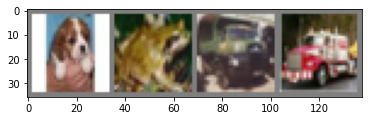

	  dog	 frog	truck	truck


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('\t' + '\t'.join('%5s' % classes[labels[j]] for j in range(4)))

## Training Network

In [5]:
NUM_EPOCH = 2
for epoch in range(NUM_EPOCH):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data     # input gambar dan label kelas
        
        optimizer.zero_grad()     # Membuat nol gradien parameter 
        
        outputs = net(inputs)     # forward propagation

        loss = criterion(outputs, labels) # menghitung nilai loss berdasarkan label prediksi dan label asli
        
        loss.backward()           # back propagation (menghitung gradien)

        optimizer.step()          # menghitung bobot baru

        running_loss += loss.item() # menjumlahkan total nilai loss
        
        # Menampilkan nilai loss setiap iterasi ke 2000 dan mereset total loss
        if (i+1) % 2000 == 0:
            print("Epoch: {} | Iterasi ke-{} | Loss = {}".format(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Epoch: 1 | Iterasi ke-2000 | Loss = 2.177752592265606
Epoch: 1 | Iterasi ke-4000 | Loss = 1.839216261357069
Epoch: 1 | Iterasi ke-6000 | Loss = 1.6683489400744438
Epoch: 1 | Iterasi ke-8000 | Loss = 1.5657977357059718
Epoch: 1 | Iterasi ke-10000 | Loss = 1.4906645216345786
Epoch: 1 | Iterasi ke-12000 | Loss = 1.4673186041265727
Epoch: 2 | Iterasi ke-2000 | Loss = 1.38437154866755
Epoch: 2 | Iterasi ke-4000 | Loss = 1.3599124923348427
Epoch: 2 | Iterasi ke-6000 | Loss = 1.3267739624232053
Epoch: 2 | Iterasi ke-8000 | Loss = 1.3129823017213493
Epoch: 2 | Iterasi ke-10000 | Loss = 1.2796159788928927
Epoch: 2 | Iterasi ke-12000 | Loss = 1.2730439757369458
Finished Training


## Menampilkan sampel data tes

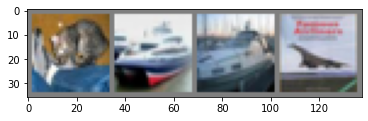

GroundTruth:    cat	 ship	 ship	plane


In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', '\t'.join('%5s' % classes[labels[j]] for j in range(4)))

## Prediksi data tes

In [10]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', '\t'.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat	 ship	 ship	plane


## Menghitung akurasi model dengan data tes

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


## Menghitung akurasi model untuk masing-masing kelas

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 80 %
Accuracy of  bird : 45 %
Accuracy of   cat : 47 %
Accuracy of  deer : 50 %
Accuracy of   dog : 37 %
Accuracy of  frog : 68 %
Accuracy of horse : 52 %
Accuracy of  ship : 71 %
Accuracy of truck : 40 %
